In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import plotting
%matplotlib inline
plt.style.use('fivethirtyeight')

# interactive visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected= True)
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('Mall_Customers.csv')
dat = ff.create_table(df)
py.iplot(dat)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
py.iplot(ff.create_table(df.describe()))

In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

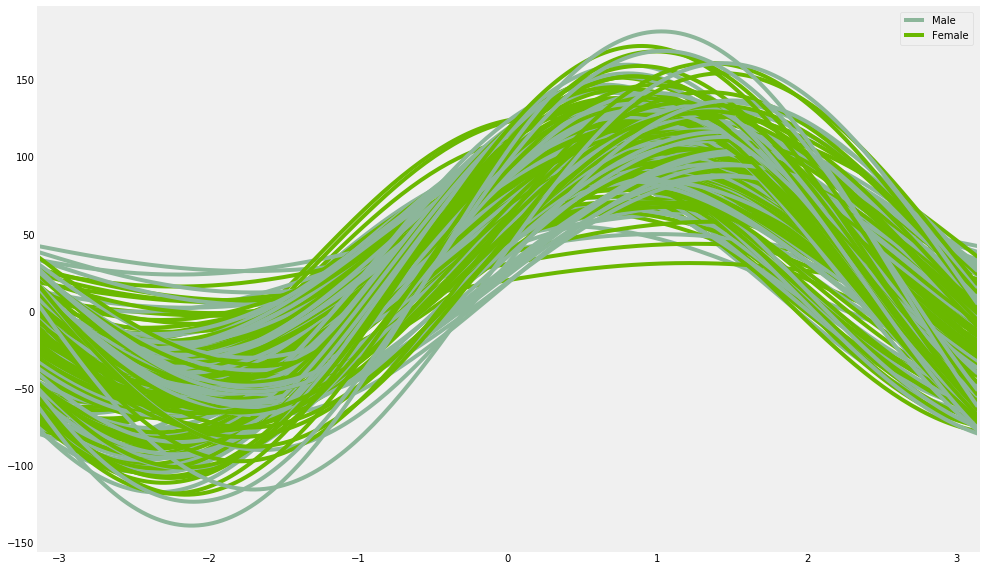

In [4]:
# Andrew Curves
plt.figure(figsize=(15,10))

plotting.andrews_curves(df.drop(['CustomerID'], axis=1), 'Gender')

Text(0, 0.5, 'Count')

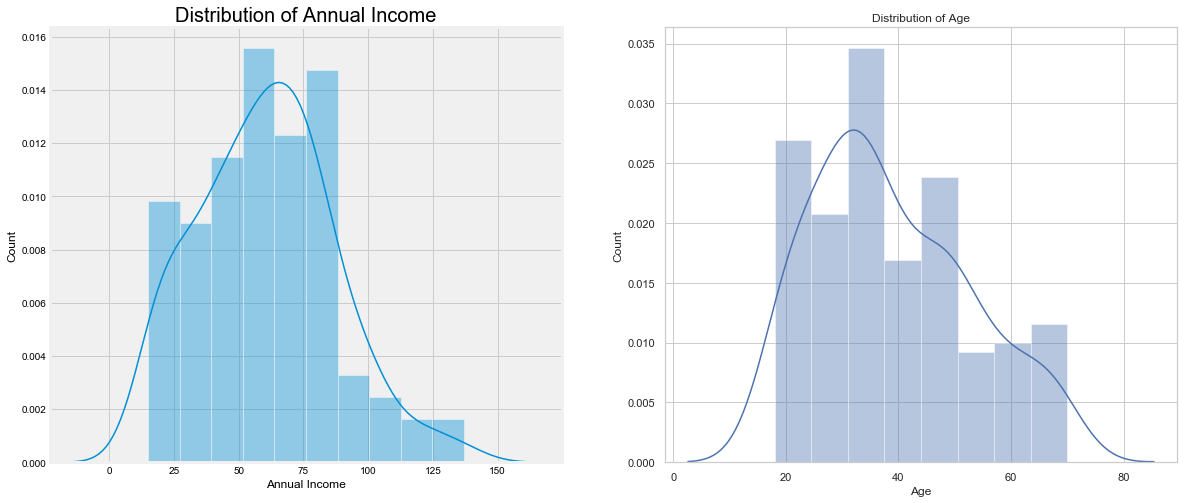

In [5]:
# Distplot

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

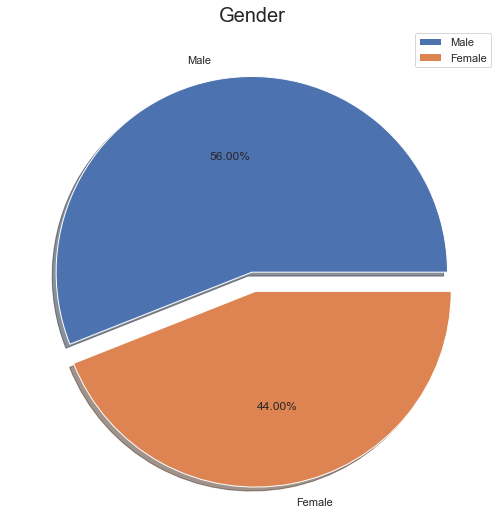

In [6]:
labels = df['Gender'].unique()
size = df['Gender'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.figure(figsize=(9,9))
plt.pie(x = size, explode= explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.legend()

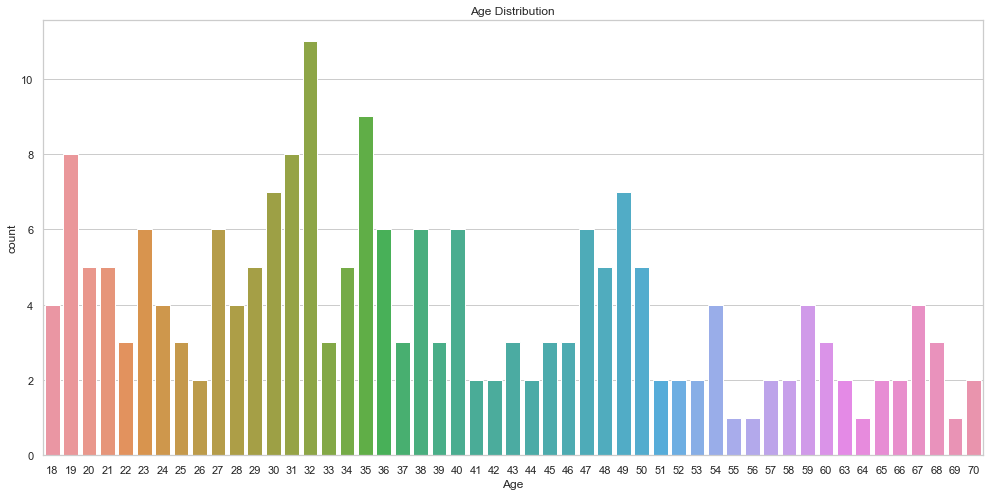

In [7]:
plt.figure(figsize=(15, 8))
plt.title('Age Distribution')
sns.countplot(df['Age'])

<Figure size 1080x576 with 0 Axes>

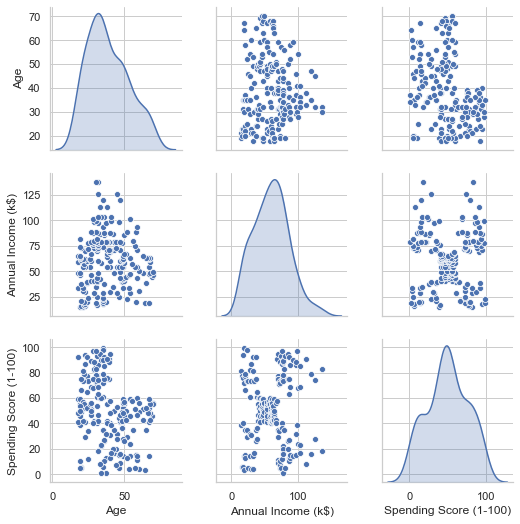

In [8]:
plt.figure(figsize=(15,8))
sns.pairplot(df.iloc[:,1:], diag_kind='kde')

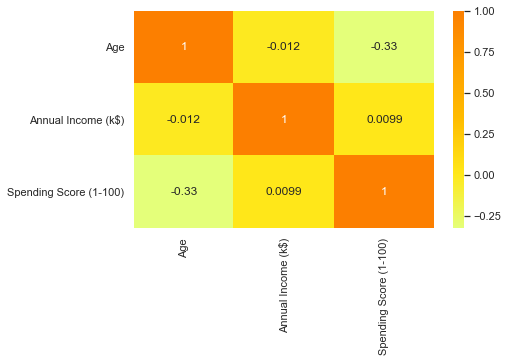

In [9]:
sns.heatmap(df.iloc[:,1:].corr(), cmap='Wistia', annot=True)

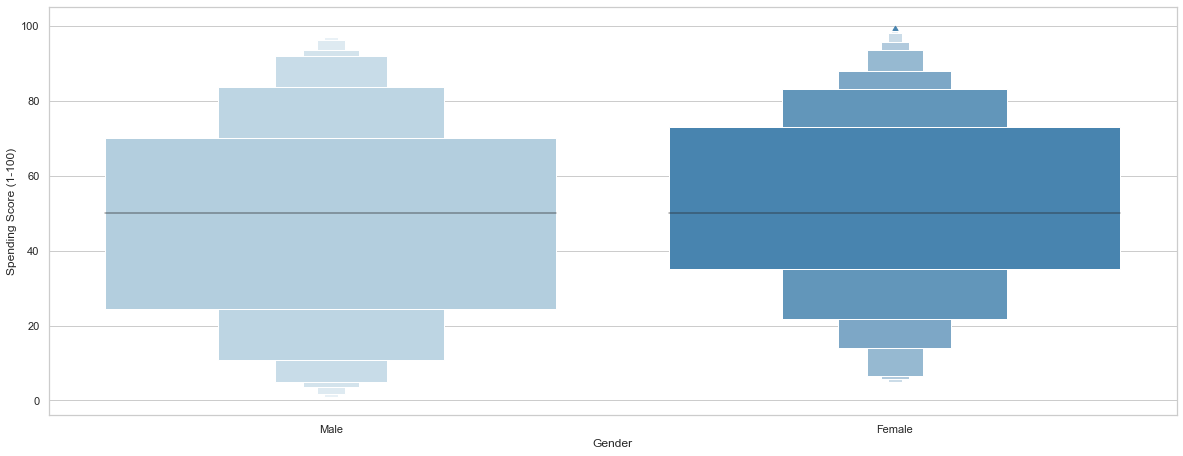

In [73]:
plt.figure(figsize=(18,7))
sns.boxenplot(y=df['Spending Score (1-100)'],  x=df['Gender'], palette='Blues')

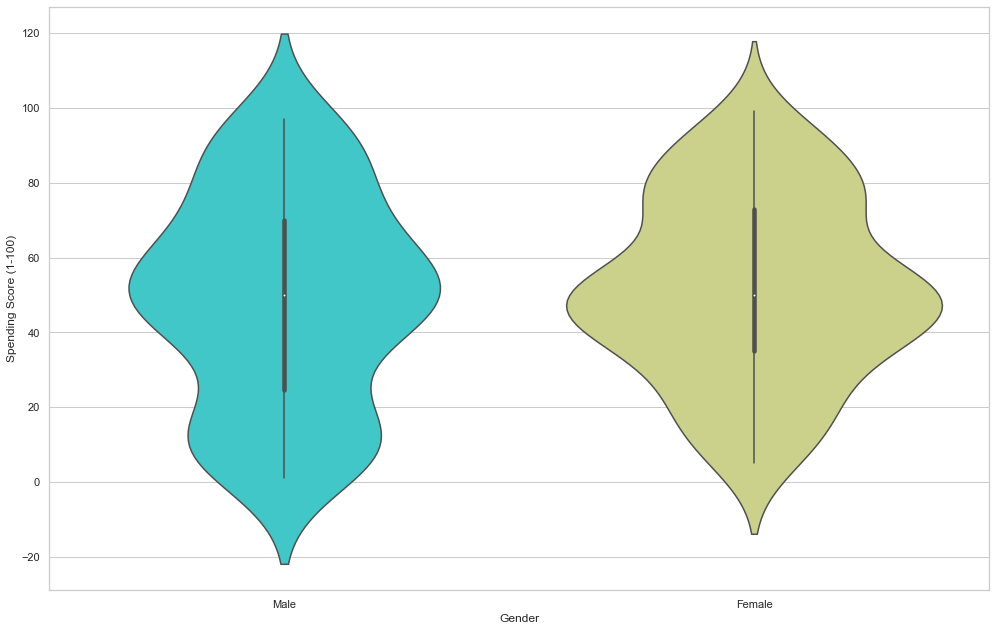

In [74]:
sns.violinplot(df['Gender'], df['Spending Score (1-100)'], palette='rainbow')

In [14]:
# K Means
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [16]:
df_scaled = df.drop(['CustomerID'], axis=1).apply(zscore)

In [17]:
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [20]:
from scipy.spatial.distance import cdist
clusters = range(1,11)
mean_distortion = []
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    model.predict(df_scaled)
    mean_distortion.append(sum(np.min(cdist(df_scaled, model.cluster_centers_), axis = 1))/df.shape[0])

[1.9311679086931692,
 1.660605870155713,
 1.4599231092978155,
 1.3243206350354253,
 1.228994844731523,
 1.0830244148810373,
 1.000922905768513,
 0.9140953480896065,
 0.8504747208997601,
 0.7979524824151758]

Text(0.5, 1.0, 'Elbow Method')

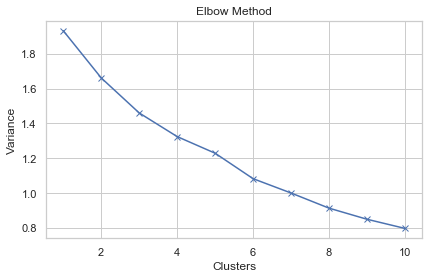

In [22]:
plt.plot(clusters, mean_distortion, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Variance')
plt.title('Elbow Method')

In [23]:
n = 6
final_model = KMeans(n_clusters=n)
final_model.fit(df_scaled)
prediction = final_model.predict(df_scaled)
df['Group'] = prediction
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3
5,6,0,22,17,76,3
6,7,0,35,18,6,0
7,8,0,23,18,94,3
8,9,1,64,19,3,5
9,10,0,30,19,72,3


In [107]:
x = df_scaled[['Annual Income (k$)','Spending Score (1-100)']].values
y_means = final_model.fit_predict(x)


In [110]:
km = KMeans(n_clusters=5)
km.fit(x)
y_means = km.fit_predict(x)

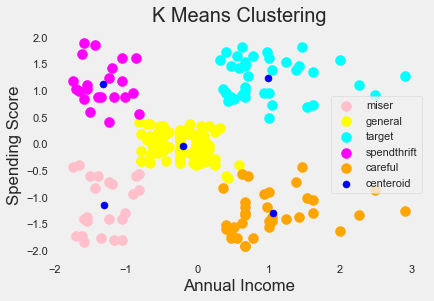

In [111]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [112]:
# Hierarchical clustering

In [116]:
from sklearn.decomposition import PCA

(200, 4)

In [121]:
pca = PCA(n_components=4)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance')

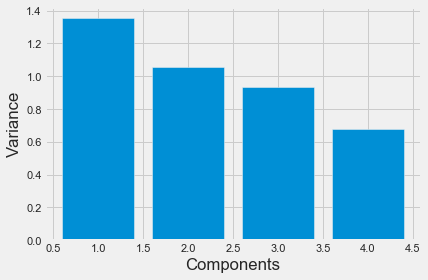

In [122]:
plt.bar(np.arange(1,5), pca.explained_variance_)
plt.xlabel('Components')
plt.ylabel('Variance')

In [129]:
pca.explained_variance_

array([1.35437369, 1.05449828, 0.93510105, 0.67612749])

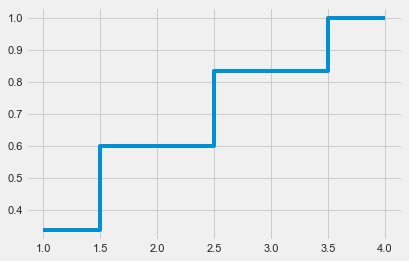

In [130]:
plt.step(np.arange(1,5), np.cumsum(pca.explained_variance_ratio_), where='mid')

In [131]:
df_pca = pca.transform(df_scaled)

In [132]:
df_pca

array([[-4.06382715e-01, -5.20713635e-01, -2.07252663e+00,
         1.33552903e+00],
       [-1.42767287e+00, -3.67310199e-01, -2.27764369e+00,
         8.23287388e-02],
       [ 5.07605706e-02, -1.89406774e+00, -3.67375232e-01,
         2.17438112e+00],
       [-1.69451310e+00, -1.63190805e+00, -7.17466691e-01,
         7.52284957e-02],
       [-3.13108383e-01, -1.81048272e+00, -4.26459924e-01,
         6.83070448e-01],
       [-1.71744627e+00, -1.59926418e+00, -6.96379423e-01,
         1.53191637e-01],
       [ 7.90821124e-01, -1.94727112e+00, -1.86491593e-01,
         1.41185800e+00],
       [-2.14832159e+00, -1.50537369e+00, -7.58463596e-01,
        -3.91407991e-01],
       [ 2.77428623e+00, -8.82987672e-01, -1.38814112e+00,
         3.55576076e-02],
       [-1.21629477e+00, -1.61640464e+00, -5.55769702e-01,
        -1.44050713e-01],
       [ 2.62905084e+00, -8.61237043e-01, -1.42011358e+00,
        -4.18453647e-01],
       [-1.68947038e+00, -1.54542784e+00, -6.55007647e-01,
      

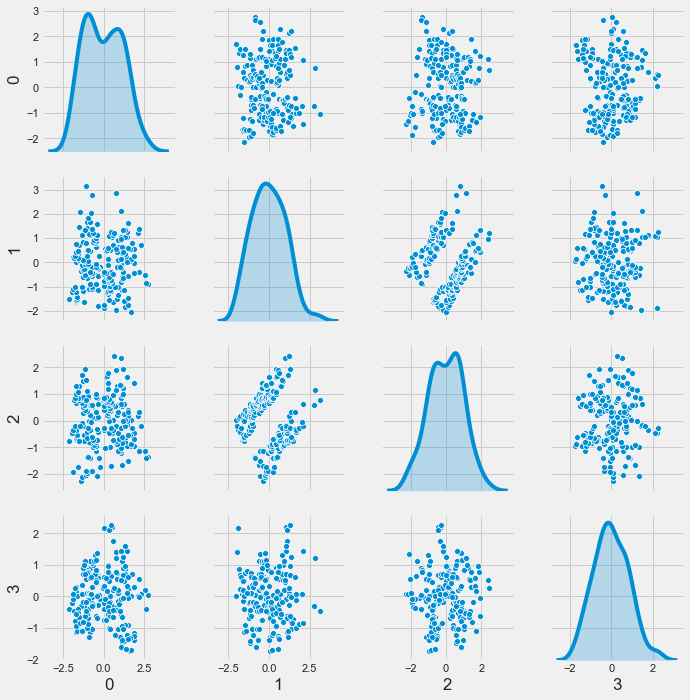

In [135]:
sns.pairplot(pd.DataFrame(df_pca), diag_kind='kde')

In [138]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage
from scipy.spatial.distance import pdist

In [145]:
z = linkage(df_pca, method='average')
c,cophenet_distance = cophenet(z, pdist(df_pca))
c

0.6750058673540061

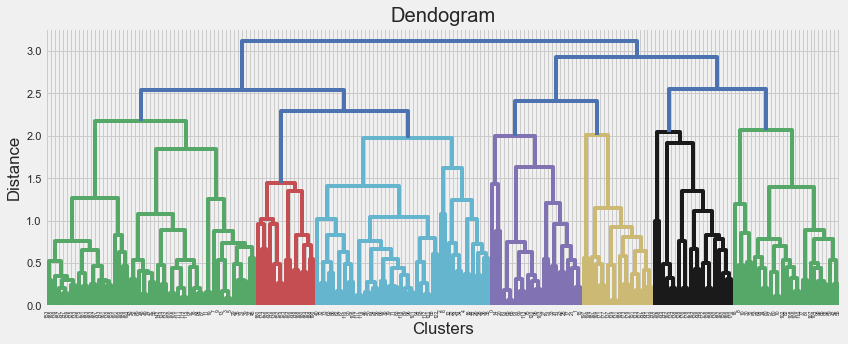

In [143]:
plt.figure(figsize=(12,5))
plt.title('Dendogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90)
plt.tight_layout()

In [146]:
model = AgglomerativeClustering(n_clusters=5, linkage='average')

In [147]:
model.fit(df_pca)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [156]:
x = df_pca
y_hc = model.fit_predict(x)

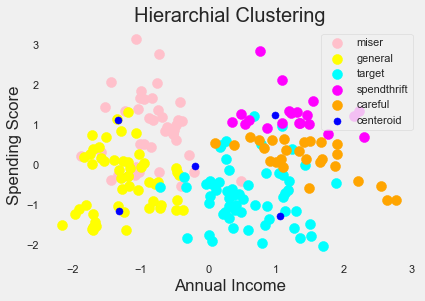

In [160]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()